In [1]:
from preprocessing import *
from model_train_predict import *
from utils import *

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from pandas.plotting import lag_plot

import warnings
warnings.filterwarnings("ignore")

In [2]:
ticker = 'AAL' # American Airlines
number = 1000

df, data = load_data(ticker=ticker, number=number)
print(len(df))

df = df.copy()[:100]

Data saved to : stock_market_data-AAL_2020-12-14.csv
1000


# 1. Exploratory Data Analys (EDA)

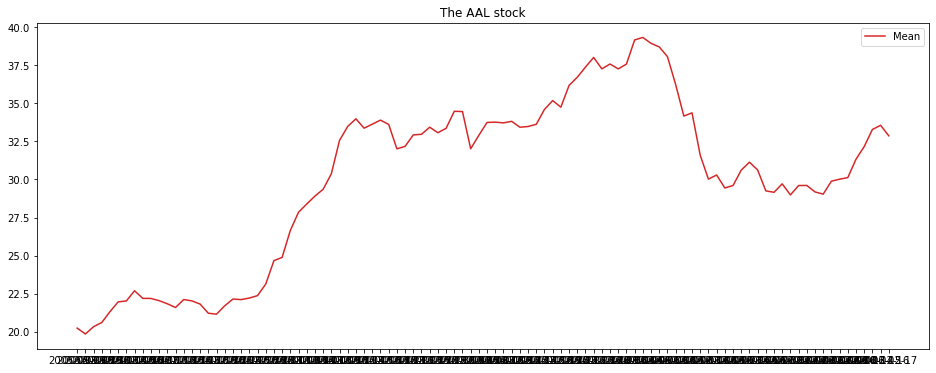

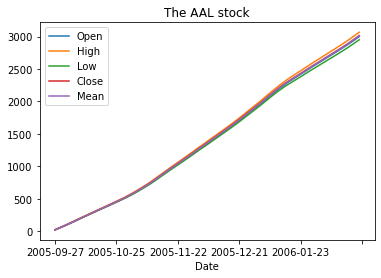

Dickey-Fuller test results

Test Statistic    -1.742441
p-value            0.409389
# of lags          0.000000
# of obs          99.000000
dtype: float64
Critical value at 1%: -3.49820
Critical value at 5%: -2.89121
Critical value at 10%: -2.58260


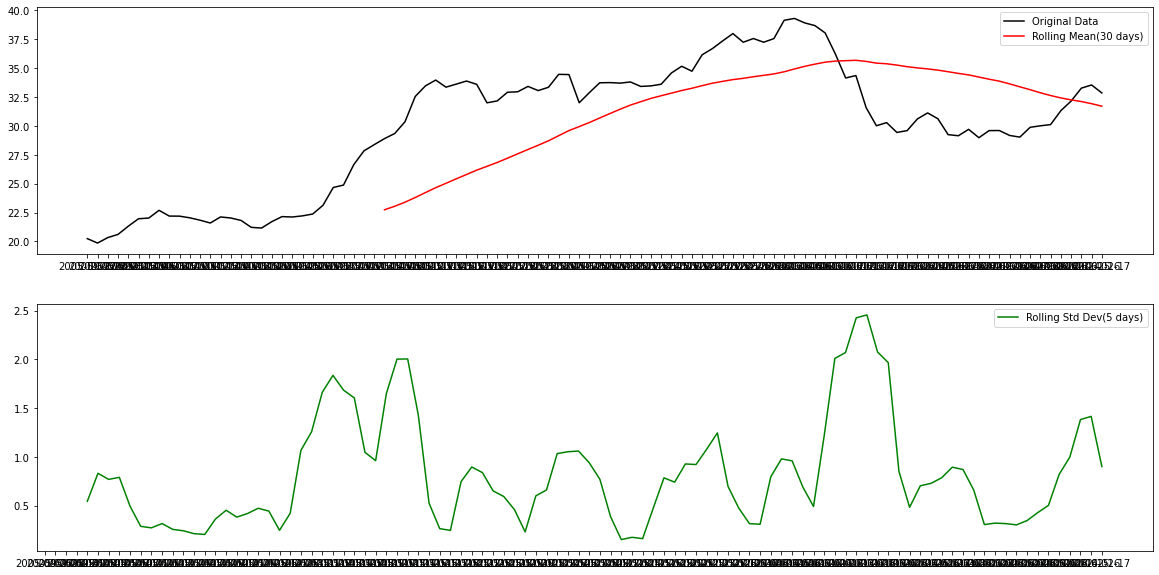

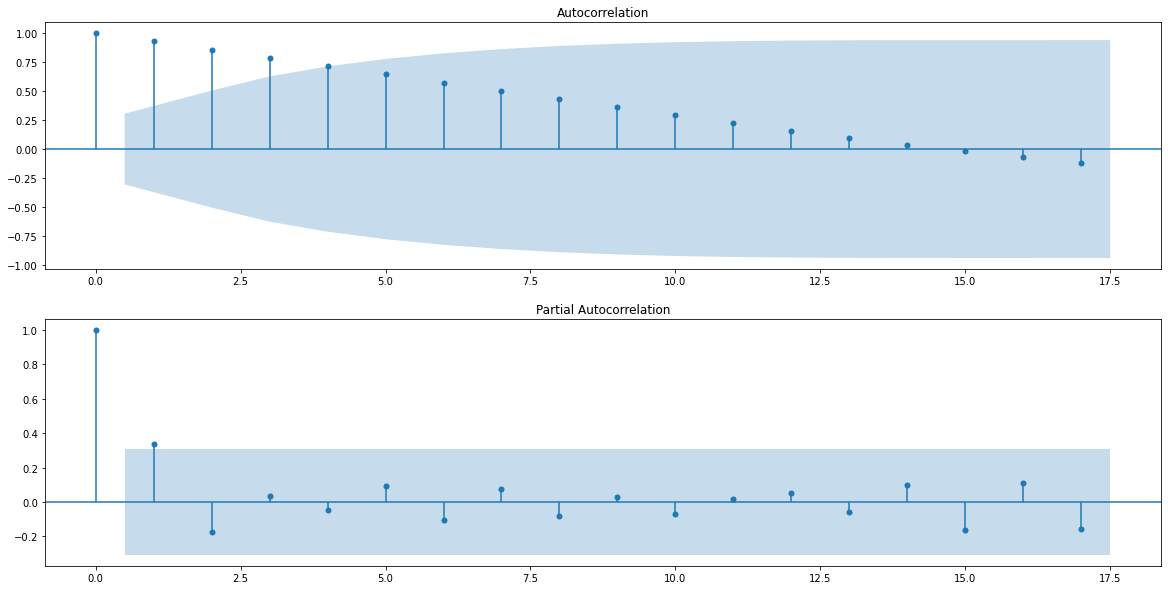

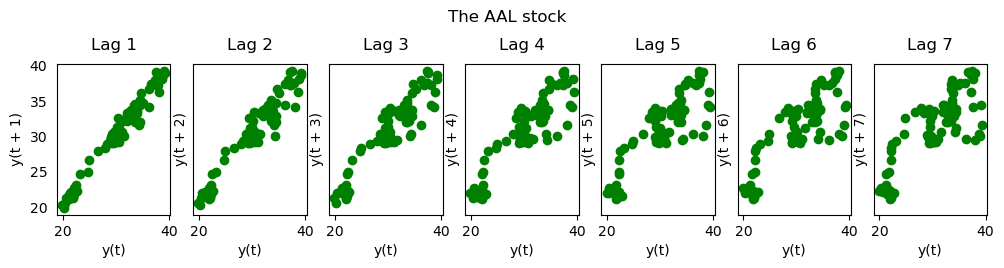

In [3]:
# overview data
plt.figure(figsize=(16,6))
plt.plot(df.Mean, label = "Mean" , color='tab:red')
plt.title(f'The {ticker} stock')
plt.legend(loc='best')
plt.show()

# Draw comulative plot
plot_cumsum(df, ticker)

# check stationarity
check_stationarity(df.Mean)

# Tính Autocorrection and Partial Autocorrection
autocorrelation_partialAutocorrection(df)

# Dùng lag_plot để view autocorrelation
autocorrelation(df, ticker)

## => timeStep = 4 + 1 = 5 (lấy 4 điểm trong quá khứ để dự đoán tương lai)

# 2. Setup general params 

## 2.1 search params for ARIMA

In [4]:
n = int(0.7 * len(data))

data_train = data[:n]
data_test = data[n:]

print(f'The shape of the data_train is {data_train.shape}')
print(f'The shape of the data_test is {data_test.shape}')

n = int(0.1 * len(data))
order = ARIMA_search_params(data[:n])

The shape of the data_train is (700, 1)
The shape of the data_test is (300, 1)
ARIMA(0, 0, 0) RMSE=4.605
ARIMA(0, 0, 1) RMSE=2.371
ARIMA(0, 0, 2) RMSE=1.770
ARIMA(0, 1, 0) RMSE=0.964
ARIMA(0, 1, 1) RMSE=0.915
ARIMA(0, 1, 2) RMSE=0.922
ARIMA(0, 2, 0) RMSE=1.100
ARIMA(0, 2, 1) RMSE=0.980
ARIMA(0, 2, 2) RMSE=1.015
ARIMA(1, 0, 0) RMSE=0.958
ARIMA(1, 0, 1) RMSE=0.907
ARIMA(1, 0, 2) RMSE=0.915
ARIMA(1, 1, 0) RMSE=0.913
ARIMA(1, 1, 1) RMSE=0.971
ARIMA(1, 1, 2) RMSE=0.945
ARIMA(1, 2, 0) RMSE=1.038
ARIMA(1, 2, 1) RMSE=1.004
ARIMA(1, 2, 2) RMSE=1.000
ARIMA(2, 0, 0) RMSE=0.905
ARIMA(2, 0, 1) RMSE=0.988
ARIMA(2, 0, 2) RMSE=0.957
ARIMA(2, 1, 0) RMSE=0.932
ARIMA(2, 1, 1) RMSE=0.936
ARIMA(2, 1, 2) RMSE=0.901
ARIMA(2, 2, 0) RMSE=0.926
ARIMA(2, 2, 1) RMSE=1.013
ARIMA(2, 2, 2) RMSE=1.016
Best ARIMA(2, 1, 2) RMSE=0.901


## 2.2. model params

In [5]:
timeStep=5
epochs = 500

# 3. Build models

## 3.1. ARIMA model

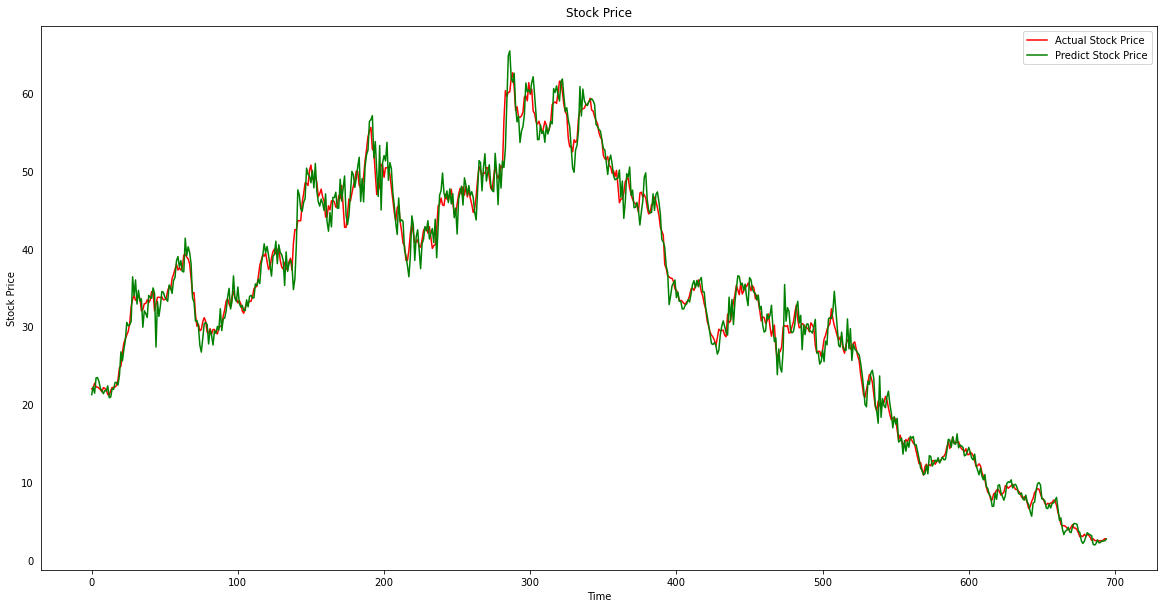

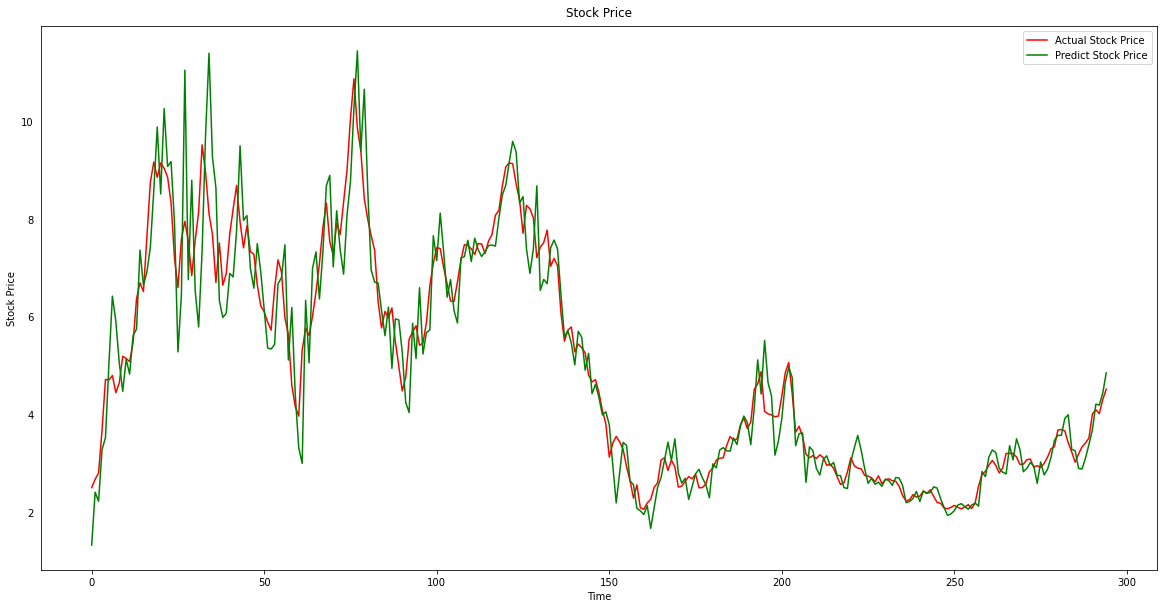

Evaluate model by RMSE and MAE:
RMSE_train, MAE_train = 1.5959, 1.1502
RMSE_test, MAE_test = 0.6952, 0.4708

Evaluate model by trend:
TRAINING SET:
Accuracy according to the trend: 0.5533
Precision  according to the trend: 0.5664
***************************************************************
TESTING SET:
Accuracy according to the trend: 0.5986
Precision  according to the trend: 0.5918


In [6]:
# predict
y_train, y_train_pred = ARIMA_single(data_train, timeStep=timeStep, order=order)

y_test, y_test_pred = ARIMA_single(data_test, timeStep=timeStep, order=order)

# plot graph
plot_actual_predict(y_train,y_train_pred)

plot_actual_predict(y_test,y_test_pred)


print('Evaluate model by RMSE and MAE:')
RMSE_test, MAE_test = evaluate_RMSE(y_test, y_test_pred)

RMSE_train, MAE_train = evaluate_RMSE(y_train, y_train_pred)

print(f'RMSE_train, MAE_train = {round(RMSE_train,4)}, {round(MAE_train, 4)}')
print(f'RMSE_test, MAE_test = {round(RMSE_test,4)}, {round(MAE_test, 4)}')

print('\nEvaluate model by trend:')
print('TRAINING SET:')
evaluate_trend(y_train, y_train_pred)
print('***************************************************************')
print('TESTING SET:')
evaluate_trend(y_test, y_test_pred)

## 3.2. LSTM model

1ms/step - loss: 0.0012 - val_loss: 1.8288e-04
Epoch 278/500
18/18 [==============================] - 0s 11ms/step - loss: 0.0011 - val_loss: 1.3681e-04
Epoch 279/500
18/18 [==============================] - 0s 12ms/step - loss: 0.0011 - val_loss: 2.2291e-04
Epoch 280/500
18/18 [==============================] - 0s 12ms/step - loss: 0.0012 - val_loss: 1.6681e-04
Epoch 281/500
18/18 [==============================] - 0s 11ms/step - loss: 0.0011 - val_loss: 3.5531e-04
Epoch 282/500
18/18 [==============================] - 0s 11ms/step - loss: 0.0011 - val_loss: 1.6456e-04
Epoch 283/500
18/18 [==============================] - 0s 11ms/step - loss: 0.0011 - val_loss: 1.3599e-04
Epoch 284/500
18/18 [==============================] - 0s 11ms/step - loss: 0.0011 - val_loss: 1.3562e-04
Epoch 285/500
18/18 [==============================] - 0s 13ms/step - loss: 0.0011 - val_loss: 1.9199e-04
Epoch 286/500
18/18 [==============================] - 0s 11ms/step - loss: 0.0010 - val_loss: 1.4586e-04

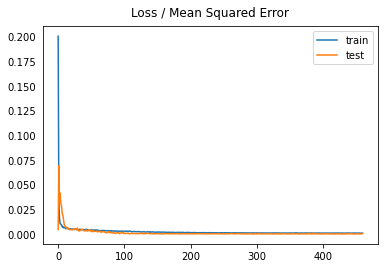

In [7]:
# train
model_lstm, hist_lstm, sc = LSTM_model(data_train, epochs=epochs, timeStep=timeStep)

plot_history(hist_lstm)

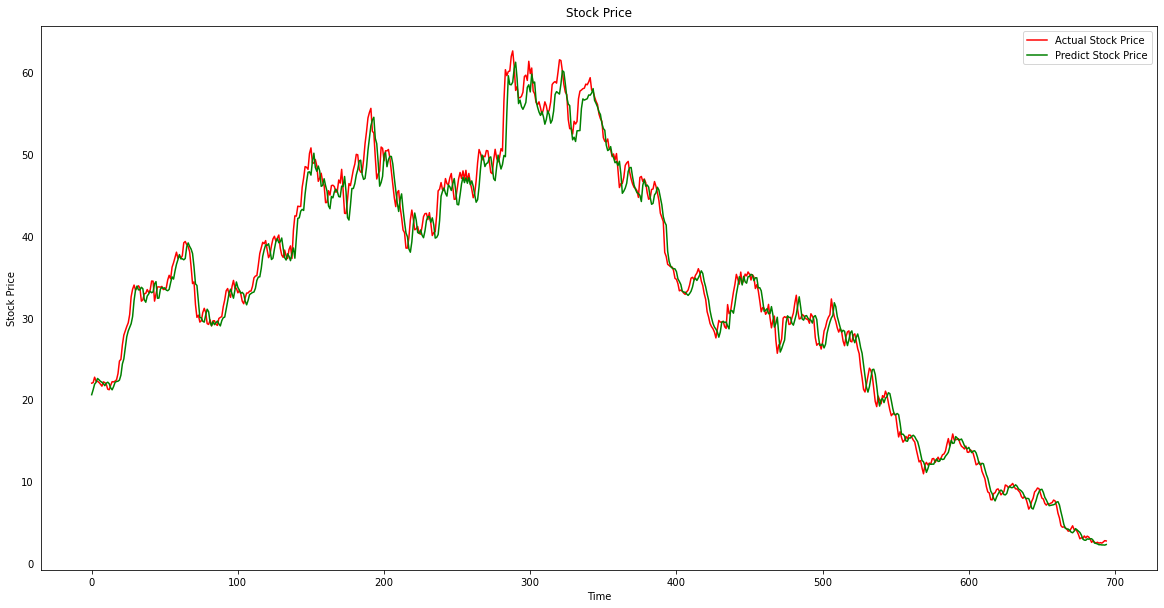

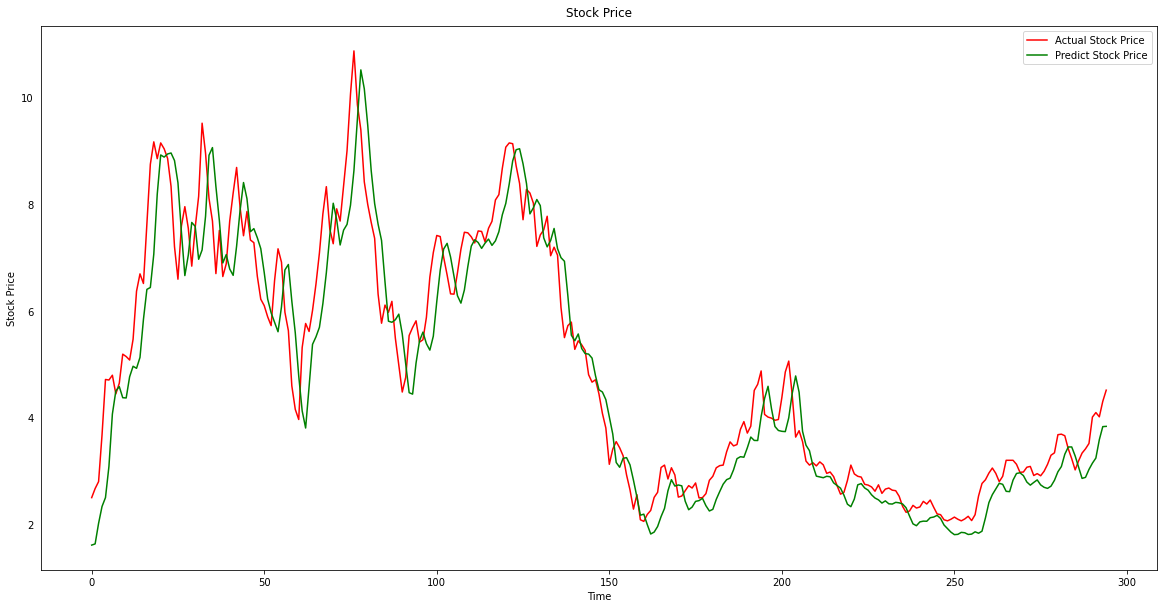

Evaluate model by RMSE and MAE:
RMSE_train, MAE_train = 1.6417, 1.2141
RMSE_test, MAE_test = 0.7572, 0.571

Evaluate model by trend:
TRAINING SET:
Accuracy according to the trend: 0.5173
Precision  according to the trend: 0.5331
***************************************************************
TESTING SET:
Accuracy according to the trend: 0.5034
Precision  according to the trend: 0.4966


In [8]:
y_train, y_train_pred = LSTM_predict(model_lstm, data_train, sc, timeStep=timeStep)

y_test, y_test_pred = LSTM_predict(model_lstm, data_test, sc, timeStep=timeStep)

# plot graphs
plot_actual_predict(y_train,y_train_pred)

plot_actual_predict(y_test,y_test_pred)

print('Evaluate model by RMSE and MAE:')
RMSE_test, MAE_test = evaluate_RMSE(y_test, y_test_pred)

RMSE_train, MAE_train = evaluate_RMSE(y_train, y_train_pred)

print(f'RMSE_train, MAE_train = {round(RMSE_train,4)}, {round(MAE_train, 4)}')
print(f'RMSE_test, MAE_test = {round(RMSE_test,4)}, {round(MAE_test, 4)}')

print('\nEvaluate model by trend:')
print('TRAINING SET:')
evaluate_trend(y_train, y_train_pred)
print('***************************************************************')
print('TESTING SET:')
evaluate_trend(y_test, y_test_pred)

## 3.3. ARIMA_LSTM model

Epoch 1/500
18/18 [==============================] - 2s 106ms/step - loss: 0.0563 - val_loss: 0.0079
Epoch 2/500
18/18 [==============================] - 0s 14ms/step - loss: 0.0372 - val_loss: 0.0128
Epoch 3/500
18/18 [==============================] - 0s 13ms/step - loss: 0.0348 - val_loss: 0.0164
Epoch 4/500
18/18 [==============================] - 0s 13ms/step - loss: 0.0347 - val_loss: 0.0177
Epoch 5/500
18/18 [==============================] - 0s 14ms/step - loss: 0.0339 - val_loss: 0.0188
Epoch 6/500
18/18 [==============================] - 0s 14ms/step - loss: 0.0337 - val_loss: 0.0169
Epoch 7/500
18/18 [==============================] - 0s 12ms/step - loss: 0.0334 - val_loss: 0.0130
Epoch 8/500
18/18 [==============================] - 0s 13ms/step - loss: 0.0330 - val_loss: 0.0175
Epoch 9/500
18/18 [==============================] - 0s 13ms/step - loss: 0.0335 - val_loss: 0.0108
Epoch 10/500
18/18 [==============================] - 0s 13ms/step - loss: 0.0322 - val_loss: 0.019

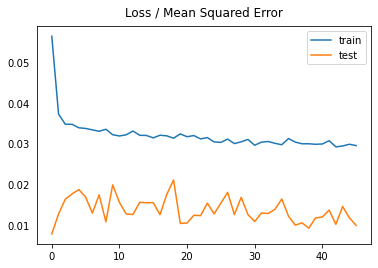

In [9]:
model, history = ARIMA_LSTM_model(data_train, order=order, epochs=epochs, timeStep=timeStep)

plot_history(history)

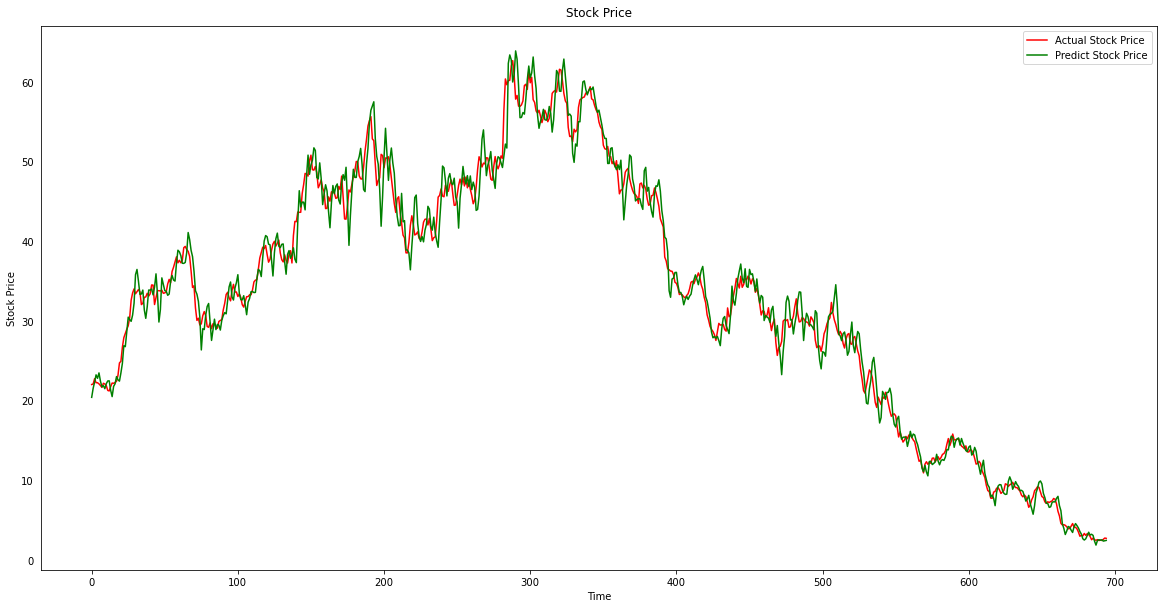

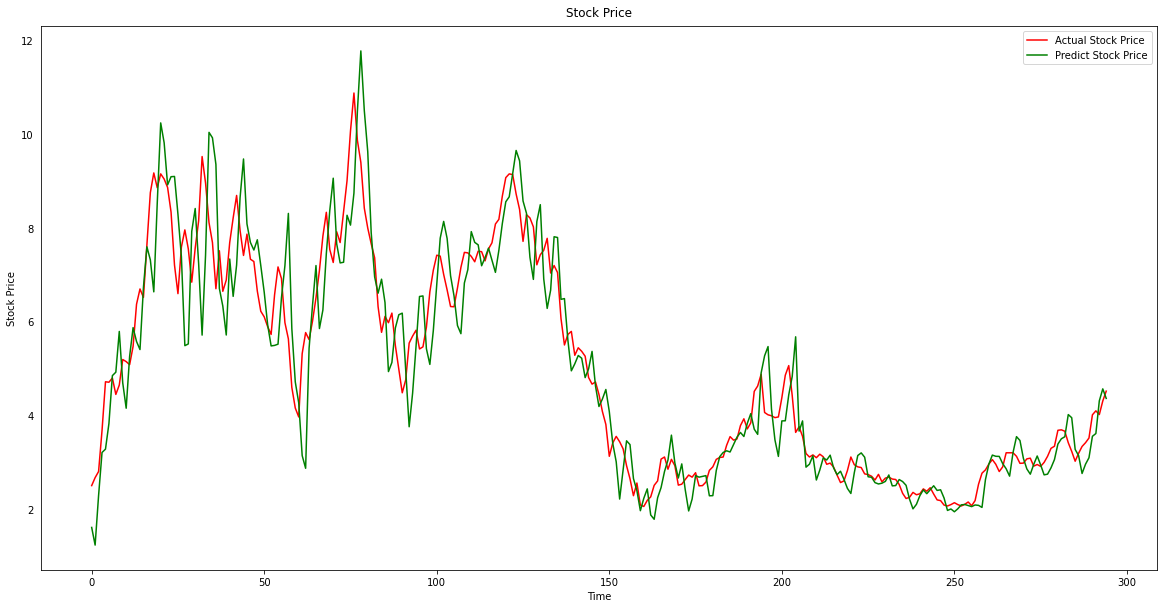

Evaluate model by RMSE and MAE:
RMSE_train, MAE_train = 1.9964, 1.4926
RMSE_test, MAE_test = 0.8639, 0.6066

Evaluate model by trend:
TRAINING SET:
Accuracy according to the trend: 0.4942
Precision  according to the trend: 0.5109
***************************************************************
TESTING SET:
Accuracy according to the trend: 0.517
Precision  according to the trend: 0.5108


In [10]:
y_train, y_train_pred = ARIMA_LSTM_predict(model, data_train,order=order, timeStep=timeStep)

y_test, y_test_pred = ARIMA_LSTM_predict(model, data_test, order=order, timeStep=timeStep)

# plot graphs
plot_actual_predict(y_train,y_train_pred)

plot_actual_predict(y_test,y_test_pred)

print('Evaluate model by RMSE and MAE:')
RMSE_test, MAE_test = evaluate_RMSE(y_test, y_test_pred)

RMSE_train, MAE_train = evaluate_RMSE(y_train, y_train_pred)

print(f'RMSE_train, MAE_train = {round(RMSE_train,4)}, {round(MAE_train, 4)}')
print(f'RMSE_test, MAE_test = {round(RMSE_test,4)}, {round(MAE_test, 4)}')

print('\nEvaluate model by trend:')
print('TRAINING SET:')
evaluate_trend(y_train, y_train_pred)
print('***************************************************************')
print('TESTING SET:')
evaluate_trend(y_test, y_test_pred)